## Compare old vs. new maxLL


In old version of maxLL estimation, I used `TrialType` as only aggregate variable and exclude `neutral` trials.

In new version of maxLL estimation, I used `TrialType` and `BlockType` as aggregate variable.


In [1]:
import sys
import os
SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)
from simulate import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

main_dir = os.path.abspath(os.path.dirname(os.getcwd()))
subject_dir = 'data/subject_data'
main_dir, subject_dir

ACT-R connection has been started.


('/home/chery/Documents/Github/RLvIBL-Re', 'data/subject_data')

## Load maxLL 

In [64]:
df0 = pd.read_csv(os.path.join(main_dir, 'data/MODELLogLikelihood.csv'), index_col=0, usecols=['HCPID', 'best_model', 'PSwitch.LL.m2', 'PSwitch.LL.m1'])
df0 = df0.rename(columns = {'PSwitch.LL.m2':'LL.m2', 'PSwitch.LL.m1':'LL.m1'})
df0['LL.diff'] = df0['LL.m1'] - df0['LL.m2']
df0 = df0.sort_values(by = 'HCPID')
# df0.to_csv(os.path.join(main_dir, 'data/old_actr_maxLL.csv'))

df1 = pd.read_csv(os.path.join(main_dir, subject_dir, 'actr_maxLL.csv'), usecols=['HCPID', 'best_model', 'LL.m1', 'LL.m2', 'LL.diff']).drop_duplicates()

In [67]:
df_compare = pd.merge(df0, df1, on='HCPID', suffixes=('.old', '.new'))

## MaxLL Plot

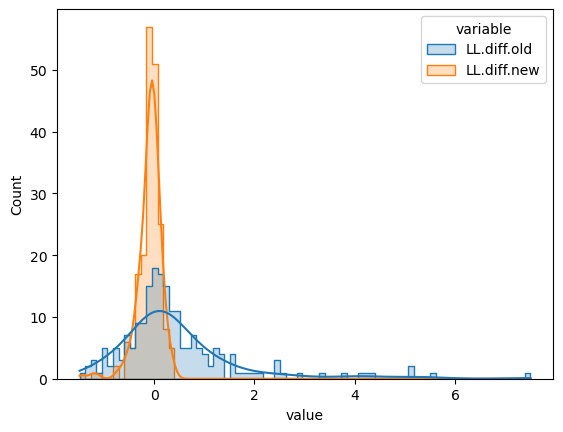

In [75]:
ax = sns.histplot(data = df_compare[['HCPID', 'LL.diff.old', 'LL.diff.new']].melt(id_vars='HCPID'), 
                  x='value', hue='variable', kde=True, element='step')
plt.show()

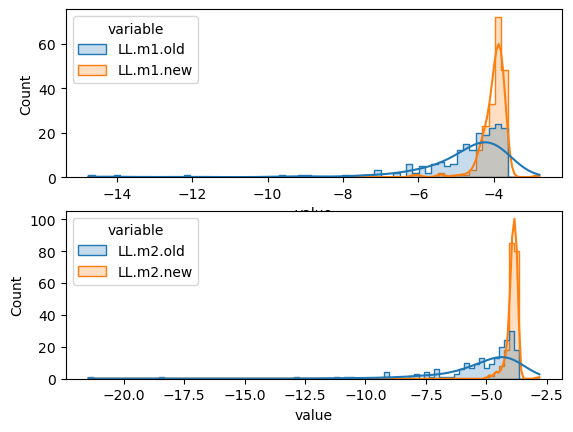

In [76]:
fig, axes = plt.subplots(2,1)
sns.histplot(data = df_compare[['HCPID', 'LL.m1.old', 'LL.m1.new']].melt(id_vars='HCPID'), 
             x='value', hue='variable', kde=True, element='step', ax=axes[0])
sns.histplot(data = df_compare[['HCPID', 'LL.m2.old', 'LL.m2.new']].melt(id_vars='HCPID'), 
             x='value', hue='variable', kde=True, element='step', ax=axes[1])
plt.show()

## Model Classification

In [79]:
def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    
    use like:
    
    >>> confusion_matrix(test_df, 'actual_label', 'predicted_label')
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )

In [97]:
dfc = confusion_matrix(df_compare, 'best_model.old', 'best_model.new')

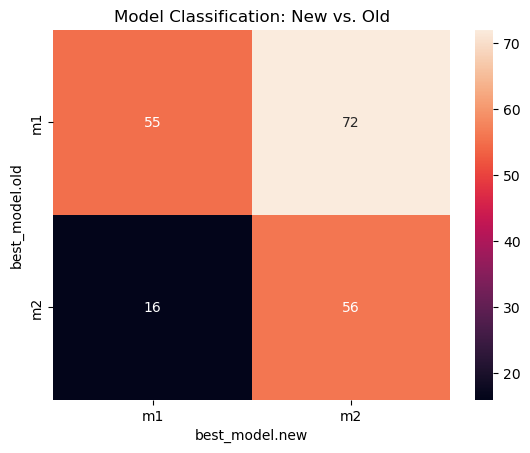

In [99]:
ax = sns.heatmap(dfc,annot=True)
plt.title('Model Classification: New vs. Old')
plt.show()